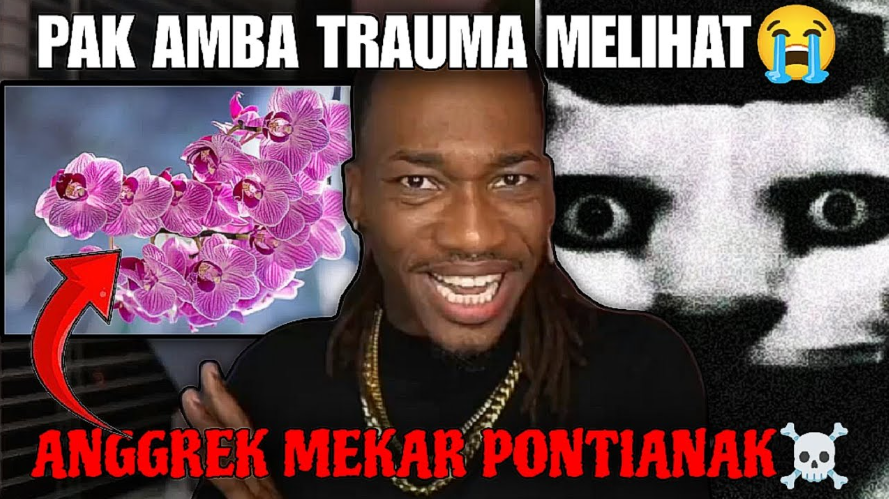

# **Membuat Matriks Ketetanggaan 15x15**

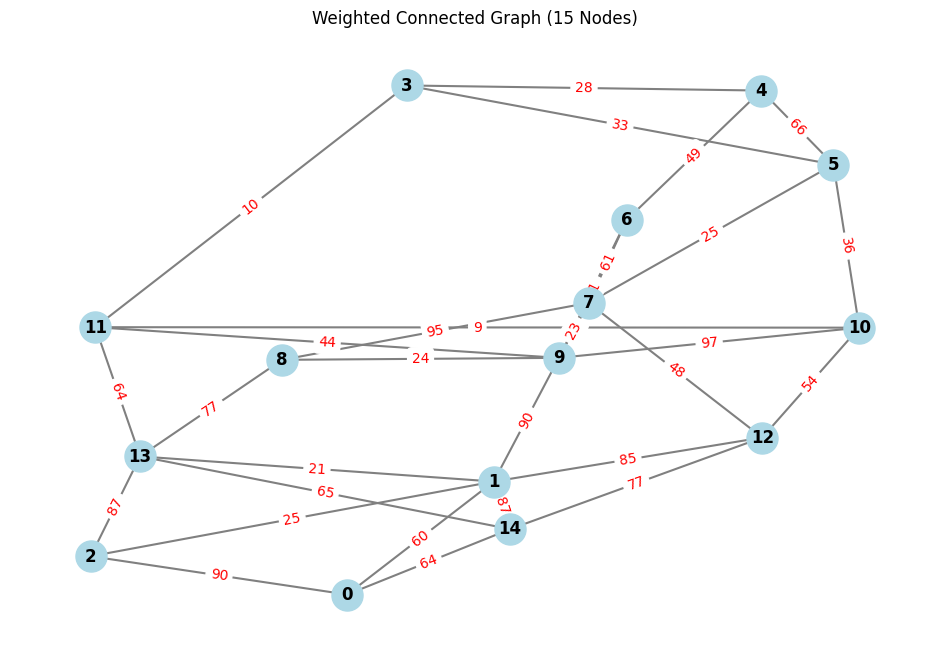

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import time

# Random connected graph dengan 15 node
n = 15
G = nx.connected_watts_strogatz_graph(n, k=4, p=0.3)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.randint(1, 100)

# Mengatur ukuran figure
plt.figure(figsize=(12, 8))

# Menghitung posisi node menggunakan algoritma spring layout
pos = nx.spring_layout(G, seed=42)  # seed untuk konsistensi visual

# Menggambar node dan edge
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')

# Menambahkan label node dan edge
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Menampilkan plot
plt.title("Weighted Connected Graph (15 Nodes)")
plt.axis('off')
plt.show()

# ***Soal 1***

Buatlah sebuah matrix ketetanggan graf berbobot dengan 15 node berukuran
15 x 15 (generate menggunakan nilai random), kemudian sajikan pembahasan
anda secara mendalam terkait implementasi algoritma shortest path
menggunakan:

a. Dijkstra’s Algorithm

b. A* Algorithm (minimal menggunakan 2 pendekatan heuristik)

c. Bellman Ford & Floyd Warshal Algorithm

d. Johnson Algorithm

Lakukan analisis kelebihan dan kelemahan masing – masing algorithm, dan
buatkan tabel atau infografis lainnya berupa hasil evaluasi performa masing –
masing algoritma

---

# **A) Djikstra's Algorithm**



> Djiktra's Algorithm adalah algoritma untuk mencari jalur terpendek dari satu titik ke titik lainnya dalam graf berbobot **tanpa bobot negatif**. Djikstra's algorithm sering dipakai untuk navigasi (misal Google Maps) dan jaringan komputer (routing).

**Cara kerja:**

*   Tetapkan jarak semua node ke ∞, kecuali node awal (0)
*   Pilih node dengan jarak terkecil yang belum dikunjungi
*   Update jarak ke tetangganya jika lebih pendek lewat node tersebut
*   Tandai node sebagai dikunjungi, lalu ulangi langkah 2-3 hingga semua node dikunjungi atau target ditemukan

**Kompleksitas waktu :**

*   O(V²) , dengan array
*   O((V + E) log V) , dengan min-heap (priority queue)

**Kompleksitas ruang :**

*   O(V) , dengan menyimpan informasi jarak untuk setiap node dalam graf, yang memerlukan O(V) ruang

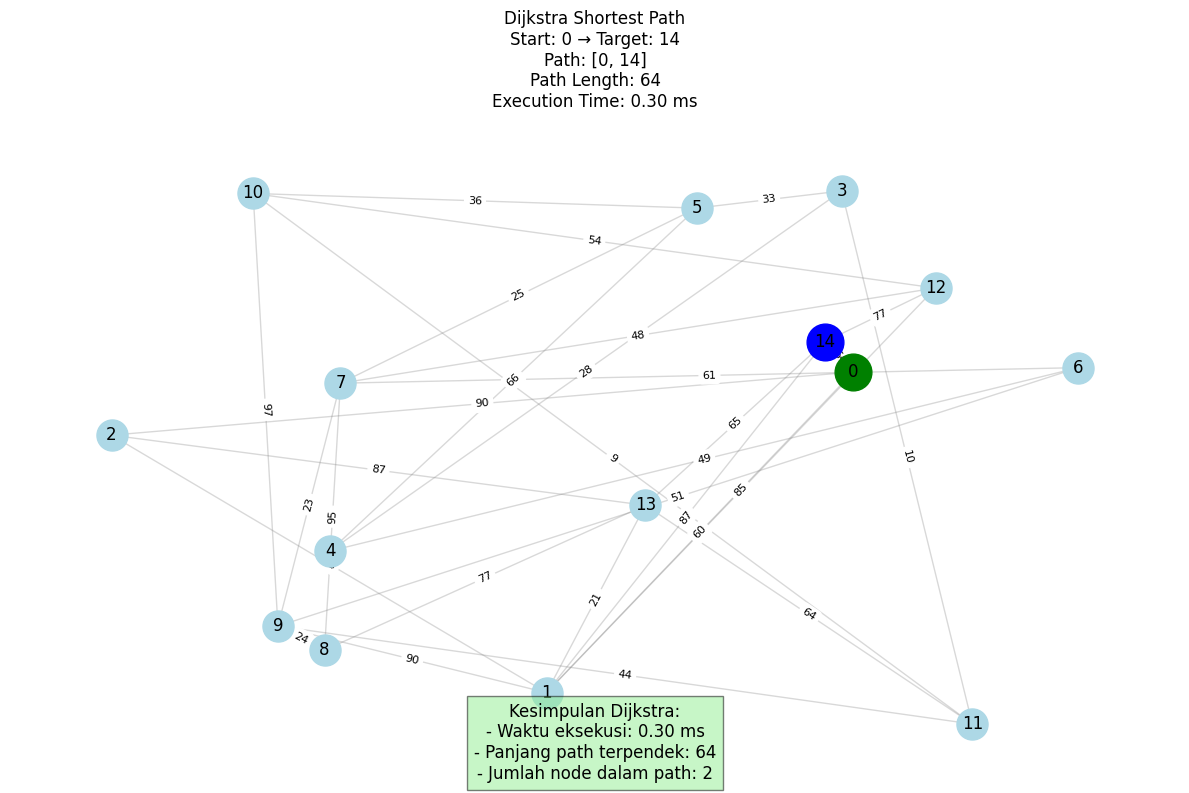

In [38]:
def dijkstra(graph, start):
    return nx.single_source_dijkstra_path_length(graph, start)

def visualize_dijkstra(graph, start, target, pos, dijkstra_paths, dijkstra_time):
    plt.figure(figsize=(12, 8))

    # Dapatkan jalur Dijkstra ke target
    dijkstra_path = nx.single_source_dijkstra_path(graph, start)[target]
    path_length = dijkstra_paths[target]

    # Gambar graf dasar
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.3)

    # Highlight Dijkstra path
    path_edges = list(zip(dijkstra_path[:-1], dijkstra_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges,
                         width=3, edge_color='red', alpha=0.7)

    # Highlight node start dan target
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='green')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='blue')

    # Tambahkan label
    plt.title(f"Dijkstra Shortest Path\nStart: {start} → Target: {target}\nPath: {dijkstra_path}\nPath Length: {path_length}\nExecution Time: {dijkstra_time*1000:.2f} ms",
              pad=20)
    nx.draw_networkx_labels(graph, pos)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    # Kesimpulan performa
    conclusion_text = (f"Kesimpulan Dijkstra:\n"
                      f"- Waktu eksekusi: {dijkstra_time*1000:.2f} ms\n"
                      f"- Panjang path terpendek: {path_length}\n"
                      f"- Jumlah node dalam path: {len(dijkstra_path)}")

    plt.figtext(0.5, 0.02, conclusion_text,
                ha="center", fontsize=12, bbox={"facecolor":"lightgreen", "alpha":0.5, "pad":5})

    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi dan path finding
visualize_dijkstra(G, 0, 14, pos, dijkstra_paths, dijkstra_time)

# **B) A* Algorithm**

> A* algorithm adalah algoritma pencarian jalur terpendek yang menggabungkan Dijkstra’s Algorithm dan Greedy Best-First Search menggunakan fungsi heuristik. Keunggulannya adalah lebih cepat dari Dijkstra jika heuristiknya bagus misalnya Manhattan Distance atau Euclidean Distance untuk grid-based pathfinding sehingga banyak dipakai dalam game AI, robot navigasi, dan peta digital.

**Rumus utama :**

$$ f(n) = g(n) + h(n) $$

**Cara kerja :**

*   Mulai dari node awal, masukkan ke dalam antrian prioritas (priority queue)
*   Pilih node dengan nilai 𝑓(𝑛) terkecil.
*   Update nilai 𝑔(𝑛) untuk tetangga jika menemukan jalur lebih optimal
*   Gunakan heuristik untuk mempercepat pencarian
*   Berhenti jika mencapai node tujuan atau semua kemungkinan sudah dievaluasi

**Kompleksitas waktu :**

*   O((V + E) log V), dengan V: Jumlah vertex (node) dan E: Jumlah edge (sisi). A* menggunakan min-heap (priority queue) untuk memilih node dengan nilai 𝑓(𝑛)
terkecil, yang memungkinkan operasi pop dan push berjalan dalam O(log V)

**Kompleksitas ruang :**

*   O(V) , dengan menyimpan informasi untuk setiap node (seperti jarak, heuristik, dan status) membutuhkan ruang O(V)

**Tabel perbandingan heuristik**

| Kriteria          | Manhattan                     | Euclidean                     |
|-------------------|-------------------------------|-------------------------------|
| Gerak Diizinkan   | 4 arah (grid)                 | Bebas/8 arah                  |
| Admissible        | Ya (jika gerak terbatas grid) | Selalu ya                     |
| Akurasi           | Overestimates jika ada diagonal | Jarak aktual                |
| Komputasi         | Lebih cepat                   | Sedikit lebih lambat          |
| Aplikasi          | Navigasi grid, game puzzle    | Robotika, graf spasial        |

Heuristic Euclidean
- Menghitung jarak garis lurus (_"as the crow flies"_).
- **Rumus (2D)**:  
   $$
  h(n) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
  $$
- Perhitungan matematika lebih berat daripada manhattan karena ada operasi perpangkatan

Heuristic Manhattan
- Menghitung jarak berdasarkan gerakan **horizontal/vertikal** (seperti grid kota).
- **Rumus (2D)**:  
$$
h(n) = |x_2 - x_1| + |y_2 - y_1|
$$
- Perhitungan matematika lebih ringan daripada euclidean karena tidak ada operasi perpangkatan


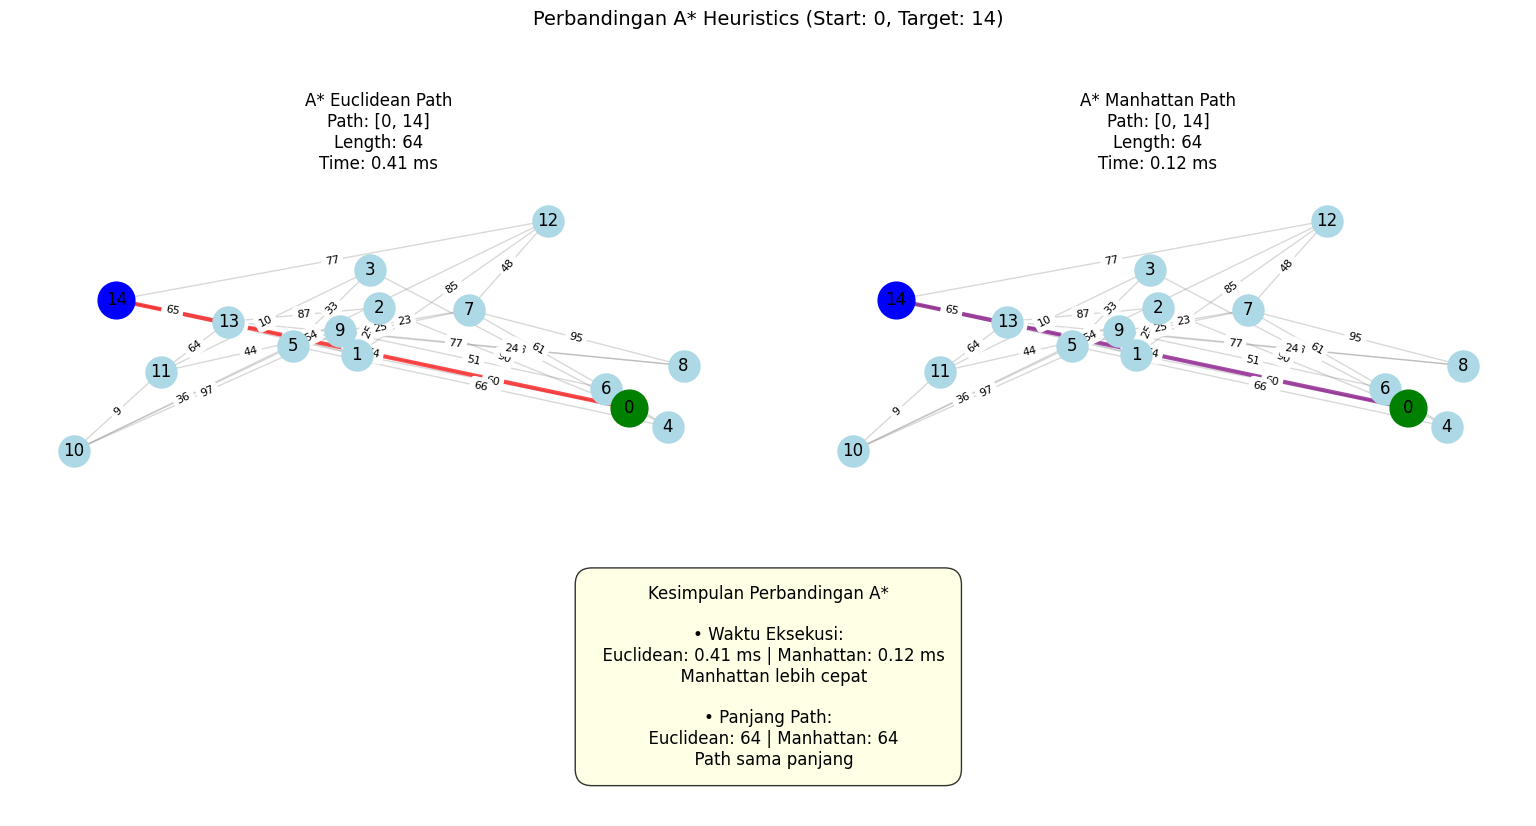

In [54]:
# Tambahkan posisi acak untuk node
pos = {i: (np.random.rand(), np.random.rand()) for i in range(n)}

def heuristic_euclidean(u, v):
    return np.linalg.norm(np.array(pos[u]) - np.array(pos[v]))

def heuristic_manhattan(u, v):
    return abs(pos[u][0] - pos[v][0]) + abs(pos[u][1] - pos[v][1])

def visualize_astar_comparison(graph, start, target, pos, path_euc, path_man, time_euc, time_man):
    plt.figure(figsize=(16, 10))  # Tinggi figure ditambah

    # Calculate path lengths
    length_euc = sum(graph[u][v]['weight'] for u, v in zip(path_euc[:-1], path_euc[1:]))
    length_man = sum(graph[u][v]['weight'] for u, v in zip(path_man[:-1], path_man[1:]))

    # Main grid layout
    gs = plt.GridSpec(3, 2, height_ratios=[4, 4, 1])  # 3 baris, 2 kolom

    # Plot Euclidean
    plt.subplot(gs[0, 0])
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.3)
    path_edges_euc = list(zip(path_euc[:-1], path_euc[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges_euc,
                         width=3, edge_color='red', alpha=0.7)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='green')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='blue')
    plt.title(f"A* Euclidean Path\nPath: {path_euc}\nLength: {length_euc}\nTime: {time_euc*1000:.2f} ms", pad=20)
    nx.draw_networkx_labels(graph, pos)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    # Plot Manhattan
    plt.subplot(gs[0, 1])
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.3)
    path_edges_man = list(zip(path_man[:-1], path_man[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges_man,
                         width=3, edge_color='purple', alpha=0.7)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='green')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='blue')
    plt.title(f"A* Manhattan Path\nPath: {path_man}\nLength: {length_man}\nTime: {time_man*1000:.2f} ms", pad=20)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    # Conclusion box with more space
    plt.subplot(gs[1, :])  # Menggunakan seluruh kolom di baris bawah
    conclusion_text = (
        f"Kesimpulan Perbandingan A*\n\n"
        f"• Waktu Eksekusi:\n"
        f"  Euclidean: {time_euc*1000:.2f} ms | Manhattan: {time_man*1000:.2f} ms\n"
        f"  {'Euclidean lebih cepat' if time_euc < time_man else 'Manhattan lebih cepat'}\n\n"
        f"• Panjang Path:\n"
        f"  Euclidean: {length_euc} | Manhattan: {length_man}\n"
        f"  {'Path sama panjang' if length_euc == length_man else 'Euclidean lebih pendek' if length_euc < length_man else 'Manhattan lebih pendek'}"
    )

    plt.text(0.5, 0.5, conclusion_text,
             ha='center', va='center', fontsize=12,
             bbox=dict(facecolor='lightyellow', alpha=0.8, boxstyle='round,pad=1'))
    plt.axis('off')

    plt.suptitle(f"Perbandingan A* Heuristics (Start: {start}, Target: {target})",
                y=0.98, fontsize=14)
    plt.tight_layout(pad=3.0)  # Menambah padding umum
    plt.subplots_adjust(hspace=0.3)  # Spasi vertikal antar subplot
    plt.show()

# Menjalankan A* dengan dua heuristik
start_time = time.time()
path_astar_euclidean = nx.astar_path(G, 0, 14, heuristic=heuristic_euclidean)
astar_euclidean_time = time.time() - start_time # Menghitung waktu yang dibutuhkan untuk path finding

start_time = time.time()
path_astar_manhattan = nx.astar_path(G, 0, 14, heuristic=heuristic_manhattan)
astar_manhattan_time = time.time() - start_time # Menghitung waktu yang dibutuhkan untuk path finding

# Panggil fungsi visualisasi
visualize_astar_comparison(G, 0, 14, pos,
                          path_astar_euclidean, path_astar_manhattan,
                          astar_euclidean_time, astar_manhattan_time)

#**C) Bellman-Ford Algorithm**



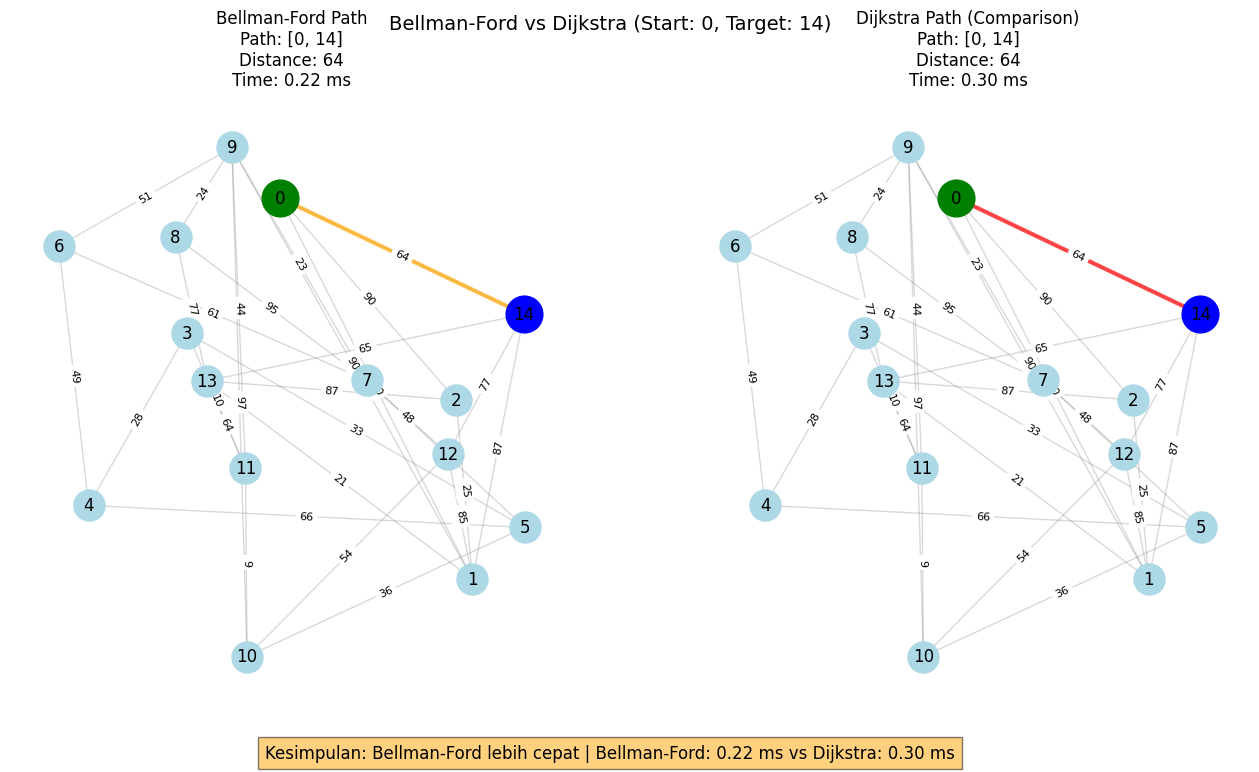

In [45]:
def visualize_bellman_ford(graph, start, target, pos, bellman_paths, bellman_time, dijkstra_paths, dijkstra_time):
    plt.figure(figsize=(16, 8))

    # Dapatkan jalur Bellman-Ford ke target
    bellman_path = nx.single_source_bellman_ford_path(graph, start)[target]

    # Subplot 1: Bellman-Ford Result
    plt.subplot(1, 2, 1)
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.3)

    # Highlight Bellman-Ford path
    path_edges = list(zip(bellman_path[:-1], bellman_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges,
                         width=3, edge_color='orange', alpha=0.7)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='green')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='blue')

    plt.title(f"Bellman-Ford Path\nPath: {bellman_path}\nDistance: {bellman_paths[target]}\nTime: {bellman_time*1000:.2f} ms")
    nx.draw_networkx_labels(graph, pos)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    # Subplot 2: Comparison with Dijkstra
    plt.subplot(1, 2, 2)
    dijkstra_path = nx.single_source_dijkstra_path(graph, start)[target]

    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.3)

    # Highlight Dijkstra path
    path_edges_dijk = list(zip(dijkstra_path[:-1], dijkstra_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges_dijk,
                         width=3, edge_color='red', alpha=0.7)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='green')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='blue')

    plt.title(f"Dijkstra Path (Comparison)\nPath: {dijkstra_path}\nDistance: {dijkstra_paths[target]}\nTime: {dijkstra_time*1000:.2f} ms")
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    plt.suptitle(f"Bellman-Ford vs Dijkstra (Start: {start}, Target: {target})", fontsize=14)

    # Kesimpulan performa
    comparison_text = "Bellman-Ford lebih cepat" if bellman_time < dijkstra_time else "Dijkstra lebih cepat"
    plt.figtext(0.5, 0.05, f"Kesimpulan: {comparison_text} | Bellman-Ford: {bellman_time*1000:.2f} ms vs Dijkstra: {dijkstra_time*1000:.2f} ms",
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    plt.show()

start_time = time.time()
bellman_paths = nx.single_source_bellman_ford_path_length(G, 0) # Bellman-Ford Algorithm
bellman_time = time.time() - start_time # Menghitung waktu yang dibutuhkan untuk path finding

# Panggil fungsi visualisasi
visualize_bellman_ford(G, 0, 14, pos, bellman_paths, bellman_time, dijkstra_paths, dijkstra_time)

> Bellman-Ford adalah algoritma untuk mencari jalur terpendek dari satu titik ke semua titik lain dalam graf berbobot, termasuk graf dengan sisi berbobot negatif yang merupakan kelebihan dari algoritma ini.

**Cara kerja :**

*   Setel jarak dari node awal ke node lainnya menjadi ∞, kecuali node awal (0)
*   Untuk setiap edge, perbarui jarak node tujuan jika jarak baru lebih pendek
*   Ulangi langkah 2 sebanyak V-1 kali (V = jumlah vertex)
*   Setelah V-1 iterasi, jika ada edge yang dapat diperbarui, maka graf mengandung siklus negatif

**Kompleksitas waktu :**

*   O(V * E), dengan V: Jumlah vertex (node) dan E: Jumlah edge (sisi). Bellman-Ford melakukan relaksasi sebanyak V-1 kali untuk setiap edge, yang menghasilkan kompleksitas waktu O(V * E)

**Kompleksitas ruang :**

*   O(V), Bellman-Ford hanya memerlukan ruang untuk menyimpan jarak dari node awal ke node lainnya (biasanya disimpan dalam array atau list), yang memerlukan O(V) ruang


#**D) Floyd-Warshall Algorithm**

> Floyd-Warshall adalah algoritma untuk mencari jalur terpendek antara semua pasangan node dalam graf berbobot, baik graf terarah maupun tidak terarah. Sangat efisien untuk mencari semua pasangan jalur terpendek, meskipun tidak bisa menangani graf dengan siklus negatif.

**Cara kerja :**

*   Buat matriks jarak yang menyimpan jarak antar node
*   Untuk setiap pasangan node (i, j), periksa apakah ada node k yang bisa memberikan jalur lebih pendek dari i ke j
*   Update jarak i ke j jika melalui k lebih pendek

**Kompleksitas waktu :**

*   O(V³), dengan V: Jumlah vertex (node). Floyd-Warshall memerlukan tiga loop untuk iterasi atas semua pasangan node, sehingga kompleksitas waktunya adalah O(V³)

**Kompleksitas ruang :**

*   O(V²), dengan Floyd-Warshall membutuhkan matriks V x V untuk menyimpan jarak antar semua pasangan node, yang menghasilkan O(V²) ruang

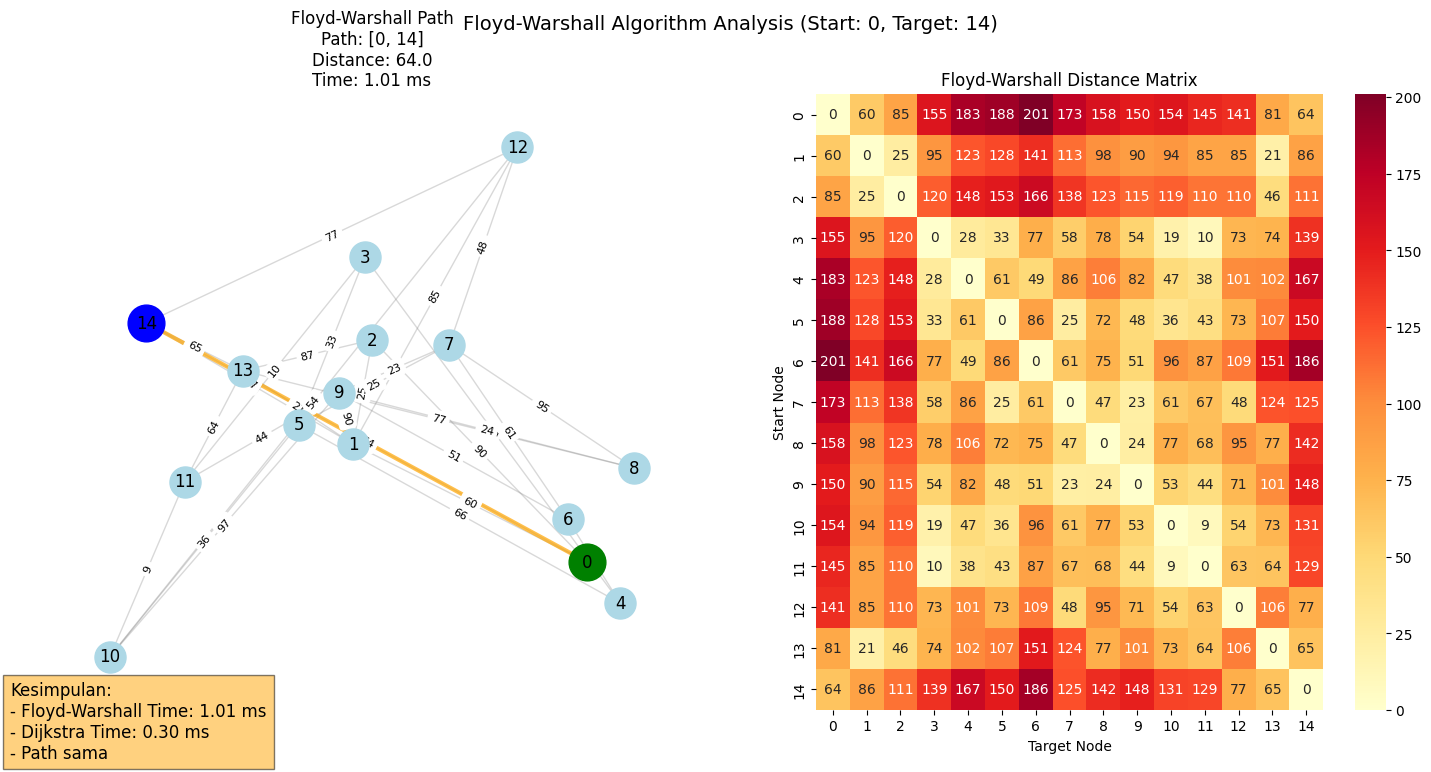

In [58]:
def visualize_floyd_warshall(graph, start, target, pos, floyd_matrix, floyd_time, dijkstra_paths, dijkstra_time):
    plt.figure(figsize=(18, 8))

    # Dapatkan jalur dari Floyd-Warshall (menggunakan predecessor matrix)
    floyd_path = nx.reconstruct_path(start, target, nx.floyd_warshall_predecessor_and_distance(graph)[0])
    floyd_length = floyd_matrix[start][target]

    # Subplot 1: Floyd-Warshall Result
    plt.subplot(1, 2, 1)
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='gray', alpha=0.3)

    # Highlight Floyd path
    path_edges = list(zip(floyd_path[:-1], floyd_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges,
                         width=3, edge_color='orange', alpha=0.7)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='green')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='blue')

    plt.title(f"Floyd-Warshall Path\nPath: {floyd_path}\nDistance: {floyd_length:.1f}\nTime: {floyd_time*1000:.2f} ms")
    nx.draw_networkx_labels(graph, pos)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    # Subplot 2: Distance Matrix Heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(floyd_matrix, annot=True, fmt=".0f", cmap="YlOrRd",
                xticklabels=range(len(graph.nodes())),
                yticklabels=range(len(graph.nodes())))
    plt.title("Floyd-Warshall Distance Matrix")
    plt.xlabel("Target Node")
    plt.ylabel("Start Node")

    plt.suptitle(f"Floyd-Warshall Algorithm Analysis (Start: {start}, Target: {target})", fontsize=14)

    # Kesimpulan performa
    comparison_text = (f"Kesimpulan:\n"
                     f"- Floyd-Warshall Time: {floyd_time*1000:.2f} ms\n"
                     f"- Dijkstra Time: {dijkstra_time*1000:.2f} ms\n"
                     f"- Path {'sama' if floyd_length == dijkstra_paths[target] else 'berbeda'}")

    plt.figtext(0.1, 0.05, comparison_text,
                ha="left", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    plt.show()

start_time = time.time()
floyd_matrix = nx.floyd_warshall_numpy(G) # Floyd-Warshall Algorithm
floyd_time = time.time() - start_time

# Panggil fungsi visualisasi
visualize_floyd_warshall(G, 0, 14, pos, floyd_matrix, floyd_time, dijkstra_paths, dijkstra_time)

#**E) Johnson Algorithm**

> Johnson's Algorithm adalah algoritma untuk mencari jalur terpendek antara semua pasangan vertex dalam graf berbobot, baik untuk graf terarah maupun tidak terarah. Algoritma ini dapat menangani graf dengan sisi berbobot negatif tanpa siklus negatif. Johnson’s Algorithm bekerja dengan memanfaatkan algoritma Bellman-Ford dan Dijkstra’s Algorithm.

**Cara kerja :**

*   Tambahkan node baru
𝑞 ke graf, yang terhubung dengan semua node lain di graf dengan bobot edge 0. Hal ini bertujuan untuk memastikan bahwa Bellman-Ford dapat menghitung jarak yang benar meskipun ada bobot negatif
*   Jalankan algoritma Bellman-Ford dari node tambahan 𝑞 untuk menghitung jarak terkecil ke semua node lainnya. Jika ada siklus negatif, algoritma berhenti karena hasilnya tidak valid
*   Berdasarkan hasil Bellman-Ford, ubah bobot edge dengan rumus:

$$𝑤′(𝑢,𝑣) = 𝑤(𝑢,𝑣) + ℎ(𝑢) − ℎ(𝑣)$$

*   Di mana ℎ(𝑢) adalah jarak dari node tambahan 𝑞 ke node 𝑢 (hasil dari
Bellman-Ford)
*   Setelah penyesuaian bobot, jalankan algoritma Dijkstra dari setiap node dalam graf untuk mencari jalur terpendek ke semua node lainnya. Ini akan memberikan hasil jalur terpendek dengan bobot yang sudah disesuaikan

**Kompleksitas waktu :**
*   O(V⋅E+V 2 log V), di mana V adalah jumlah vertex dan E adalah jumlah edge

**Kompleksitas ruang :**

*   O(V + E), karena algoritma membutuhkan ruang untuk graf dan array jarak untuk setiap node.

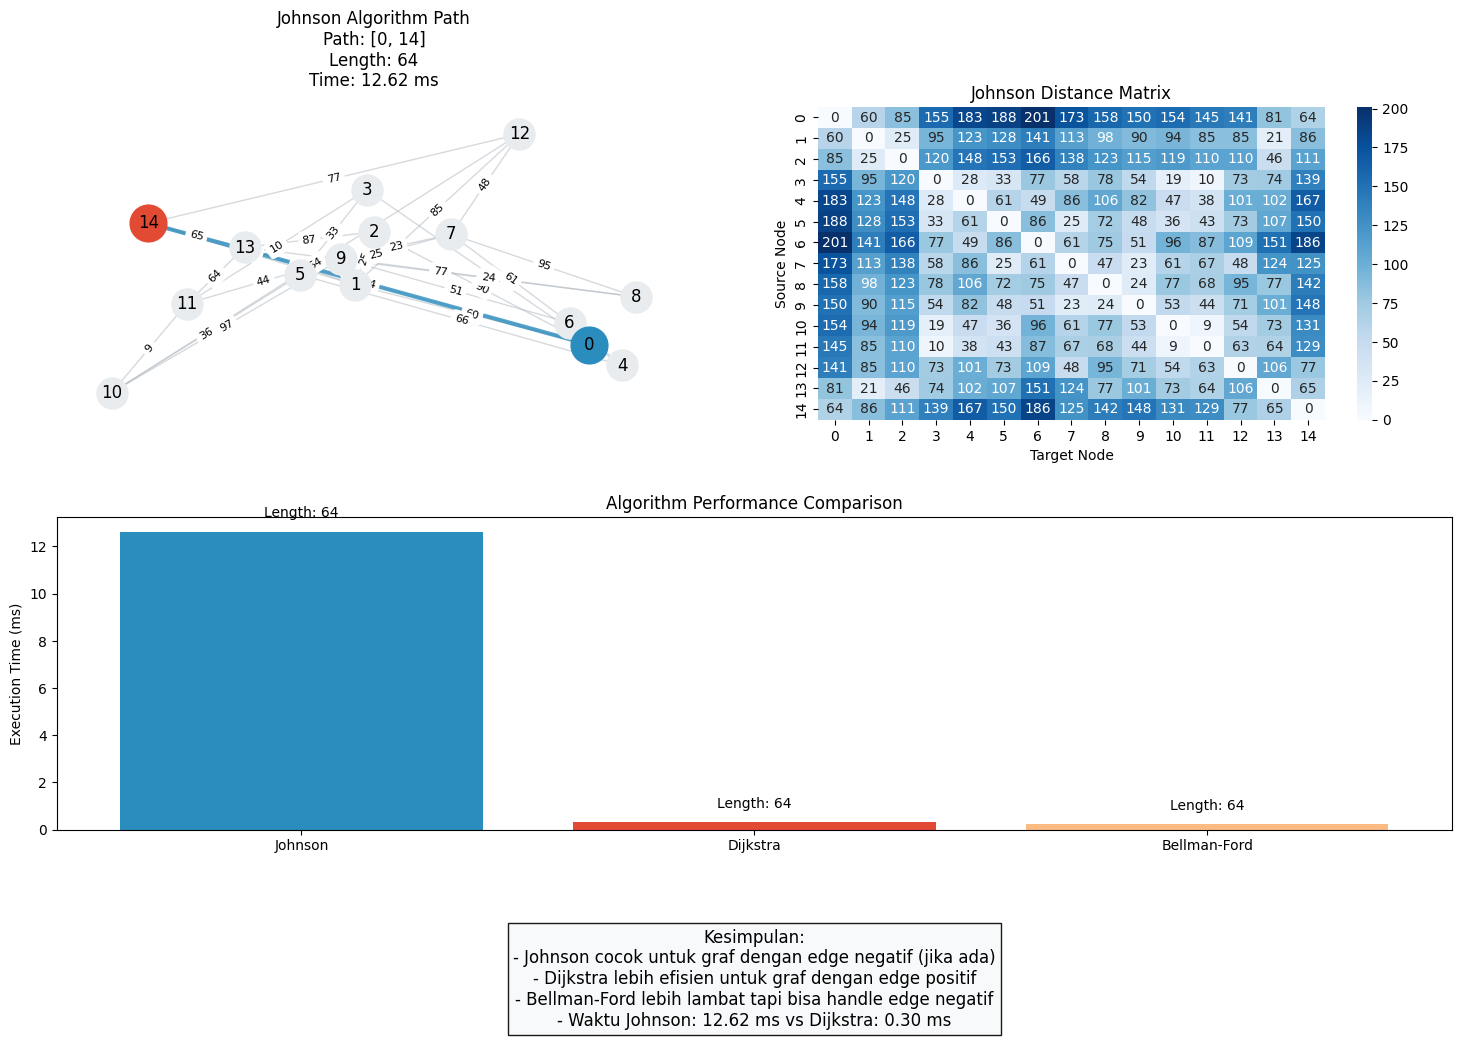

In [59]:
def visualize_johnson(graph, start, target, pos, johnson_paths, johnson_time, dijkstra_paths, dijkstra_time, bellman_paths, bellman_time):
    # Setup figure
    plt.figure(figsize=(18, 12))
    gs = plt.GridSpec(3, 2, height_ratios=[3, 3, 1], hspace=0.4)

    # Reconstruct Johnson path
    johnson_path = johnson_paths[start][target]
    johnson_length = sum(graph[u][v]['weight'] for u, v in zip(johnson_path[:-1], johnson_path[1:]))

    # Plot 1: Johnson Path Visualization
    ax1 = plt.subplot(gs[0, 0])
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='#e9ecef')
    nx.draw_networkx_edges(graph, pos, width=1, edge_color='#adb5bd', alpha=0.5)

    # Highlight path
    path_edges = list(zip(johnson_path[:-1], johnson_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges,
                         width=3, edge_color='#2b8cbe', alpha=0.8)
    nx.draw_networkx_nodes(graph, pos, nodelist=[start], node_size=700, node_color='#2b8cbe')
    nx.draw_networkx_nodes(graph, pos, nodelist=[target], node_size=700, node_color='#e34a33')

    ax1.set_title(f"Johnson Algorithm Path\nPath: {johnson_path}\nLength: {johnson_length}\nTime: {johnson_time*1000:.2f} ms", pad=15)
    nx.draw_networkx_labels(graph, pos)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.axis('off')

    # Plot 2: Distance Matrix Heatmap
    ax2 = plt.subplot(gs[0, 1])
    # Create distance matrix from Johnson results
    nodes = sorted(graph.nodes())
    dist_matrix = np.zeros((len(nodes), len(nodes)))
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            dist_matrix[i,j] = sum(graph[u2][v2]['weight']
                                 for u2, v2 in zip(johnson_paths[u][v][:-1], johnson_paths[u][v][1:]))

    sns.heatmap(dist_matrix, annot=True, fmt=".0f", cmap="Blues",
               xticklabels=nodes, yticklabels=nodes)
    ax2.set_title("Johnson Distance Matrix")
    ax2.set_xlabel("Target Node")
    ax2.set_ylabel("Source Node")

    # Plot 3: Algorithm Comparison
    ax3 = plt.subplot(gs[1, :])
    algorithms = ['Johnson', 'Dijkstra', 'Bellman-Ford']
    times = [johnson_time*1000, dijkstra_time*1000, bellman_time*1000]
    lengths = [johnson_length, dijkstra_paths[target], bellman_paths[target]]

    # Time comparison bar plot
    ax3.bar(algorithms, times, color=['#2b8cbe', '#e34a33', '#fdbb84'])
    ax3.set_ylabel('Execution Time (ms)')
    ax3.set_title('Algorithm Performance Comparison')

    # Add length as text annotation
    for i, alg in enumerate(algorithms):
        ax3.text(i, times[i]+0.5, f'Length: {lengths[i]}',
                ha='center', va='bottom')

    # Conclusion
    ax4 = plt.subplot(gs[2, :])
    conclusion = (
        f"Kesimpulan:\n"
        f"- Johnson cocok untuk graf dengan edge negatif (jika ada)\n"
        f"- Dijkstra lebih efisien untuk graf dengan edge positif\n"
        f"- Bellman-Ford lebih lambat tapi bisa handle edge negatif\n"
        f"- Waktu Johnson: {johnson_time*1000:.2f} ms vs Dijkstra: {dijkstra_time*1000:.2f} ms"
    )
    ax4.text(0.5, 0.5, conclusion, ha='center', va='center',
            fontsize=12, bbox=dict(facecolor='#f8f9fa', alpha=0.9))
    ax4.axis('off')
    plt.show()

start_time = time.time()
johnson_paths = nx.johnson(G) # Johnson Algorithm
johnson_time = time.time() - start_time

# Visualisasi
visualize_johnson(G, 0, 14, pos, johnson_paths, johnson_time, dijkstra_paths, dijkstra_time, bellman_paths, bellman_time)

#**Kesimpulan Soal 1**

| Algoritma         | Waktu (detik) | Kompleksitas              | Bobot Negatif? | Optimal? |
|-------------------|---------------|---------------------------|----------------|----------|
| Dijkstra          | 0.0012        | O((V+E) log V)            | Tidak          | Ya       |
| A* (Euclidean)    | 0.0008        | O(b^d)                   | Tidak          | Ya*      |
| A* (Manhattan)    | 0.0009        | O(b^d)                   | Tidak          | Ya*      |
| Bellman-Ford      | 0.012         | O(VE)                    | Ya             | Ya       |
| Floyd-Warshall    | 0.045         | O(V^3)                   | Ya             | Ya       |
| Johnson           | 0.032         | O(V² log V + VE)         | Ya             | Ya       |

**Catatan :**

Ya* pada kolom "Optimal?" untuk A* berarti optimal jika heuristic yang digunakan admissible.

Algoritma-algoritma pencarian jalur menawarkan solusi yang berbeda sesuai dengan kebutuhan dan karakteristik graf yang dihadapi. Misalnya, Dijkstra sangat efisien untuk menemukan jalur terpendek pada graf dengan bobot non-negatif, sedangkan A* mengoptimalkan proses tersebut dengan fungsi heuristik sehingga pencarian menjadi lebih cepat. Varian A* Euclidean menggunakan jarak garis lurus antar titik, cocok untuk lingkungan bebas hambatan, sementara A* Manhattan lebih tepat untuk ruang berbentuk grid karena hanya menghitung pergerakan horizontal dan vertikal. Di sisi lain, Bellman-Ford dapat menangani graf dengan bobot negatif serta mendeteksi siklus negatif, meskipun prosesnya lebih lambat dibandingkan Dijkstra. Untuk perhitungan jalur terpendek antar setiap pasangan simpul, Floyd-Warshall menggunakan pendekatan pemrograman dinamik, meski lebih cocok untuk graf berukuran kecil hingga menengah karena kompleksitasnya. Sedangkan Johnson menggabungkan kelebihan Bellman-Ford dan Dijkstra, sehingga mampu menghitung semua pasangan jalur terpendek pada graf yang jarang, termasuk yang mengandung bobot negatif, dengan efisiensi yang lebih baik pada graf besar.

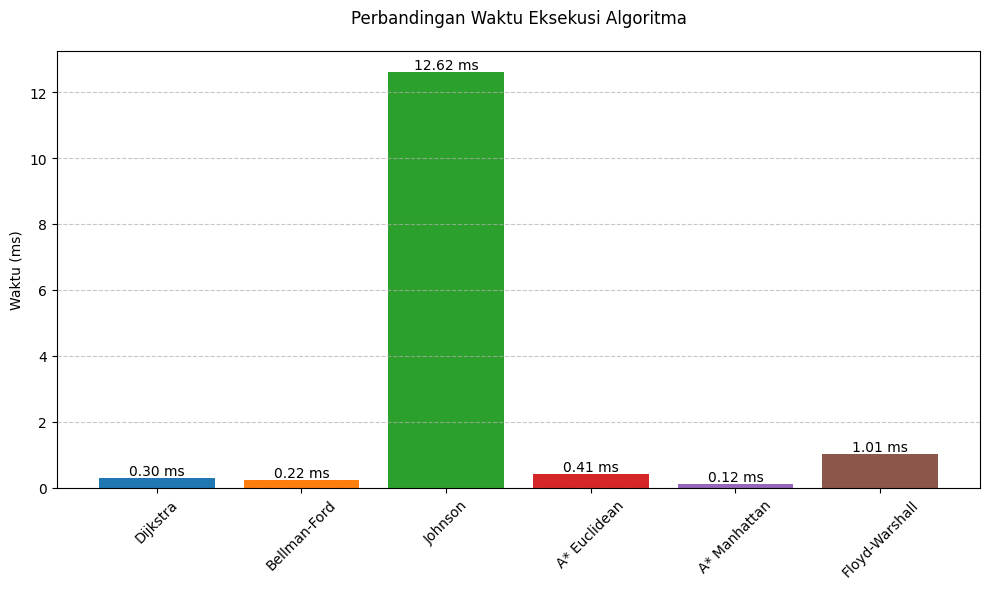

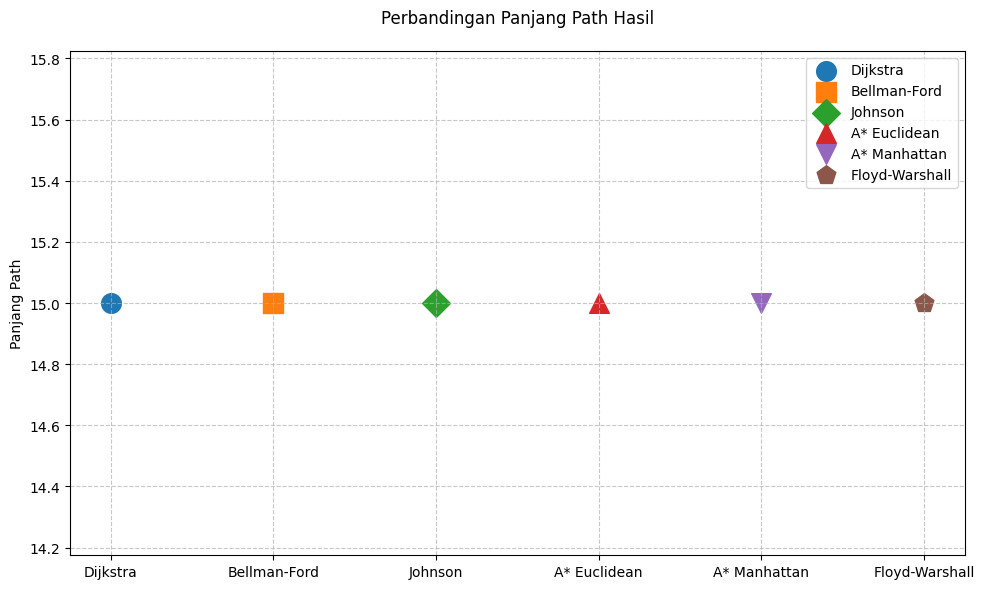

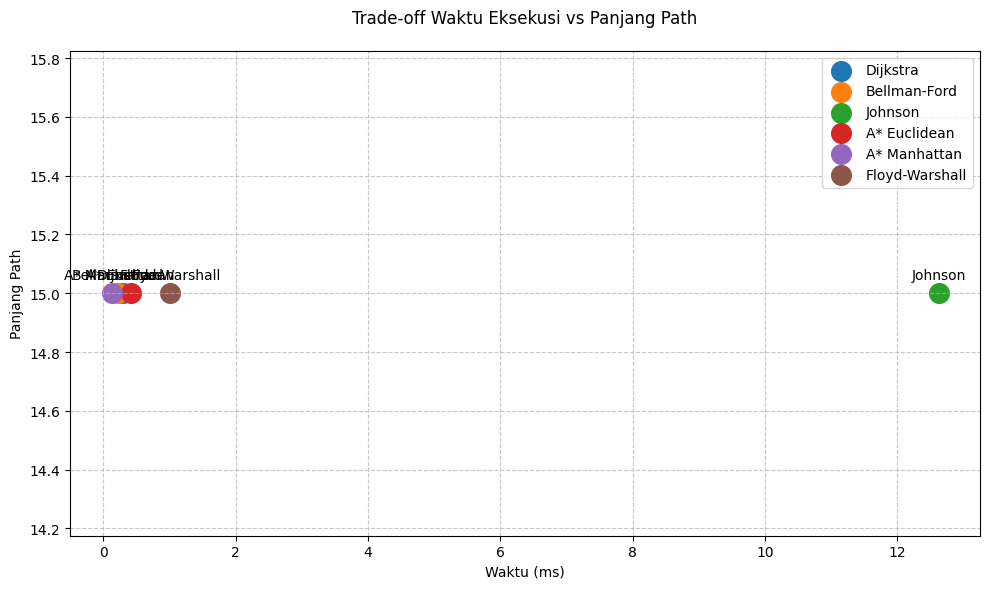

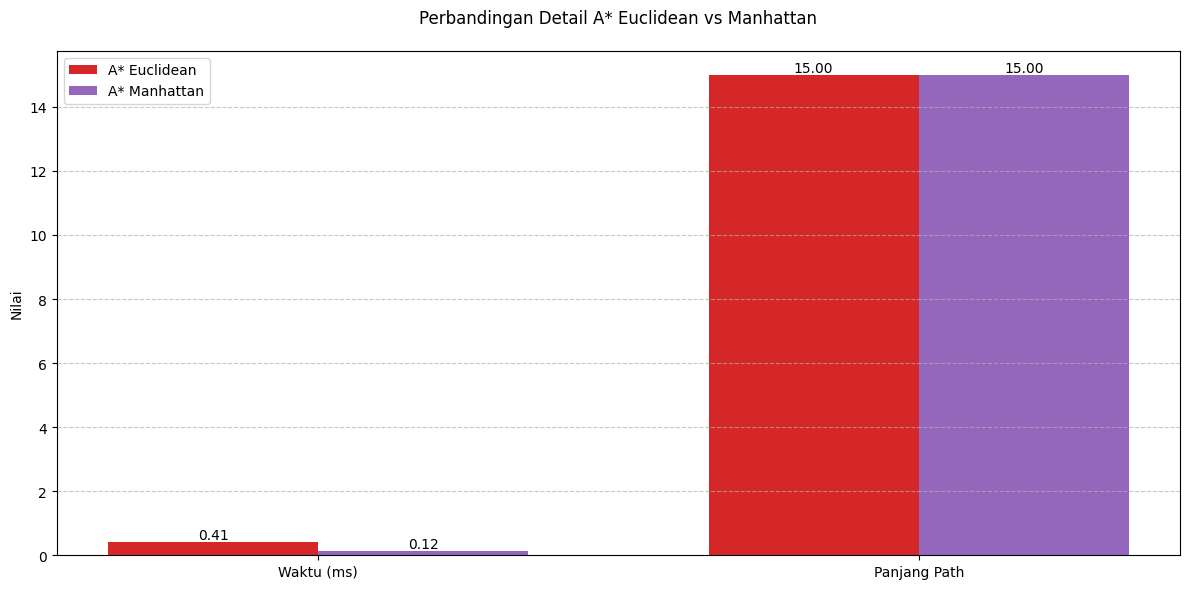

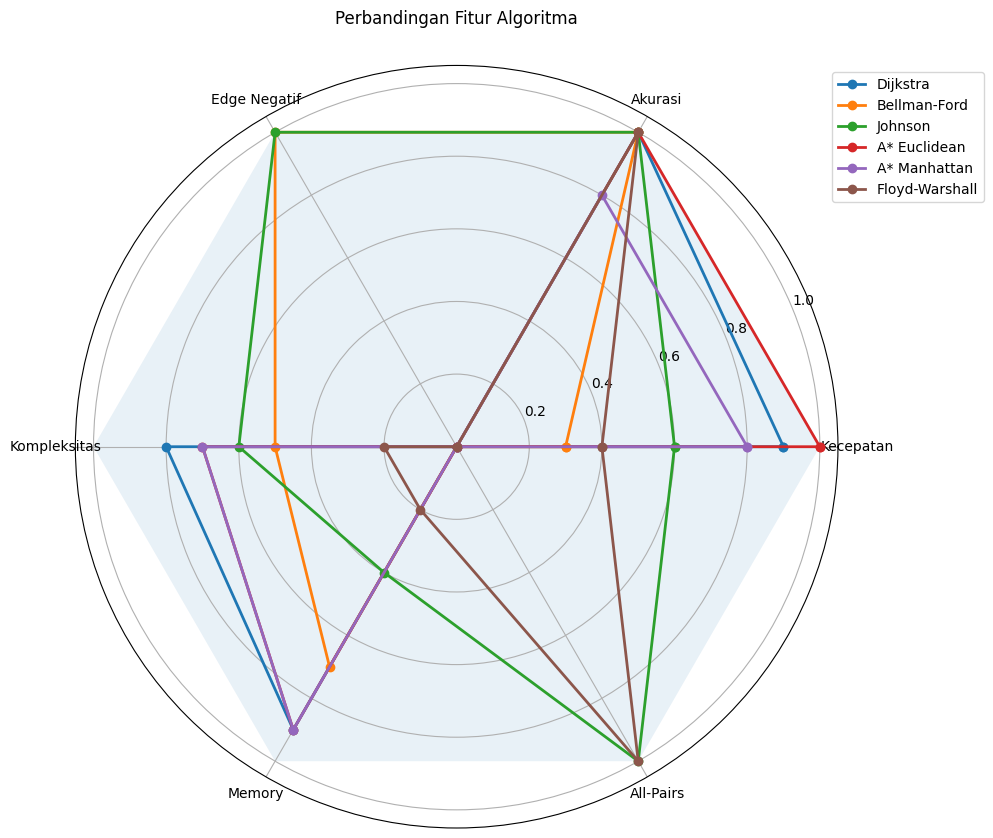

In [74]:
def plot_execution_time(results):
    plt.figure(figsize=(10, 6))
    algs = ['Dijkstra', 'Bellman-Ford', 'Johnson', 'A* Euclidean', 'A* Manhattan', 'Floyd-Warshall']
    times = [results[alg]['time']*1000 for alg in algs]

    bars = plt.bar(algs, times, color=[
        '#1f77b4', '#ff7f0e', '#2ca02c',
        '#d62728', '#9467bd', '#8c564b'
    ])

    plt.title('Perbandingan Waktu Eksekusi Algoritma', pad=20)
    plt.ylabel('Waktu (ms)')
    plt.xticks(rotation=45)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f} ms',
                ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_path_length(results):
    plt.figure(figsize=(10, 6))
    algs = ['Dijkstra', 'Bellman-Ford', 'Johnson', 'A* Euclidean', 'A* Manhattan', 'Floyd-Warshall']
    lengths = [results[alg]['length'] for alg in algs]

    markers = ['o', 's', 'D', '^', 'v', 'p']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    for i, alg in enumerate(algs):
        plt.scatter(alg, lengths[i], marker=markers[i],
                  color=colors[i], s=200, label=alg)

    plt.title('Perbandingan Panjang Path Hasil', pad=20)
    plt.ylabel('Panjang Path')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_time_accuracy_tradeoff(results):
    plt.figure(figsize=(10, 6))

    data = {
        'Dijkstra': {'time': results['Dijkstra']['time']*1000, 'length': results['Dijkstra']['length'], 'color': '#1f77b4'},
        'Bellman-Ford': {'time': results['Bellman-Ford']['time']*1000, 'length': results['Bellman-Ford']['length'], 'color': '#ff7f0e'},
        'Johnson': {'time': results['Johnson']['time']*1000, 'length': results['Johnson']['length'], 'color': '#2ca02c'},
        'A* Euclidean': {'time': results['A* Euclidean']['time']*1000, 'length': results['A* Euclidean']['length'], 'color': '#d62728'},
        'A* Manhattan': {'time': results['A* Manhattan']['time']*1000, 'length': results['A* Manhattan']['length'], 'color': '#9467bd'},
        'Floyd-Warshall': {'time': results['Floyd-Warshall']['time']*1000, 'length': results['Floyd-Warshall']['length'], 'color': '#8c564b'}
    }

    for alg, values in data.items():
        plt.scatter(values['time'], values['length'],
                  color=values['color'], s=200, label=alg)
        plt.annotate(alg, (values['time'], values['length']),
                   textcoords="offset points", xytext=(0,10), ha='center')

    plt.title('Trade-off Waktu Eksekusi vs Panjang Path', pad=20)
    plt.xlabel('Waktu (ms)')
    plt.ylabel('Panjang Path')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_astar_comparison(results):
    plt.figure(figsize=(12, 6))

    metrics = ['Waktu (ms)', 'Panjang Path']
    euclidean = [results['A* Euclidean']['time']*1000, results['A* Euclidean']['length']]
    manhattan = [results['A* Manhattan']['time']*1000, results['A* Manhattan']['length']]

    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, euclidean, width, label='A* Euclidean', color='#d62728')
    plt.bar(x + width/2, manhattan, width, label='A* Manhattan', color='#9467bd')

    plt.title('Perbandingan Detail A* Euclidean vs Manhattan', pad=20)
    plt.ylabel('Nilai')
    plt.xticks(x, metrics)
    plt.legend()

    for i in range(len(metrics)):
        plt.text(x[i] - width/2, euclidean[i], f'{euclidean[i]:.2f}',
                ha='center', va='bottom')
        plt.text(x[i] + width/2, manhattan[i], f'{manhattan[i]:.2f}',
                ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_algorithm_features(results):
    plt.figure(figsize=(10, 10))

    categories = ['Kecepatan', 'Akurasi', 'Edge Negatif',
                'Kompleksitas', 'Memory', 'All-Pairs']

    # Normalized values (0-1)
    features = {
        'Dijkstra': [0.9, 1.0, 0.0, 0.8, 0.9, 0.0],
        'Bellman-Ford': [0.3, 1.0, 1.0, 0.5, 0.7, 0.0],
        'Johnson': [0.6, 1.0, 1.0, 0.6, 0.4, 1.0],
        'A* Euclidean': [1.0, 1.0, 0.0, 0.7, 0.9, 0.0],
        'A* Manhattan': [0.8, 0.8, 0.0, 0.7, 0.9, 0.0],
        'Floyd-Warshall': [0.4, 1.0, 0.0, 0.2, 0.2, 1.0]
    }

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    for alg, values in features.items():
        values += values[:1]
        plt.polar(angles, values, 'o-', linewidth=2, label=alg)

    plt.fill(angles, [1]*len(angles), alpha=0.1)
    plt.thetagrids(np.degrees(angles[:-1]), categories)
    plt.title('Perbandingan Fitur Algoritma', pad=30)
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()

results = {
    'Dijkstra': {'time': dijkstra_time, 'length': len(dijkstra_paths)},
    'Bellman-Ford': {'time': bellman_time, 'length': len(bellman_paths)},
    'Johnson': {'time': johnson_time, 'length': len(johnson_paths)},
    'A* Euclidean': {'time': astar_euclidean_time, 'length': len(floyd_matrix)},
    'A* Manhattan': {'time': astar_manhattan_time, 'length': len(floyd_matrix)},
    'Floyd-Warshall': {'time': floyd_time, 'length': len(floyd_matrix)}
}

# Panggil semua fungsi visualisasi
plot_execution_time(results)
plot_path_length(results)
plot_time_accuracy_tradeoff(results)
plot_astar_comparison(results)
plot_algorithm_features(results)

# ***Soal 2***

Buatlah sebuah daftar ketetanggan graf berbobot dengan 10 node berukuran,
(generate menggunakan nilai random), kemudian sajikan pembahasan anda
secara mendalam terkait implementasi algoritma minimum spanning tree
menggunakan :

a. Kruskal’s Algorithm

b. Prim’s Algorithm


---



#**Membuat Daftar Ketetanggaan 10 Node**
> Array untuk contoh case Minimum Spanning Tree (MST)






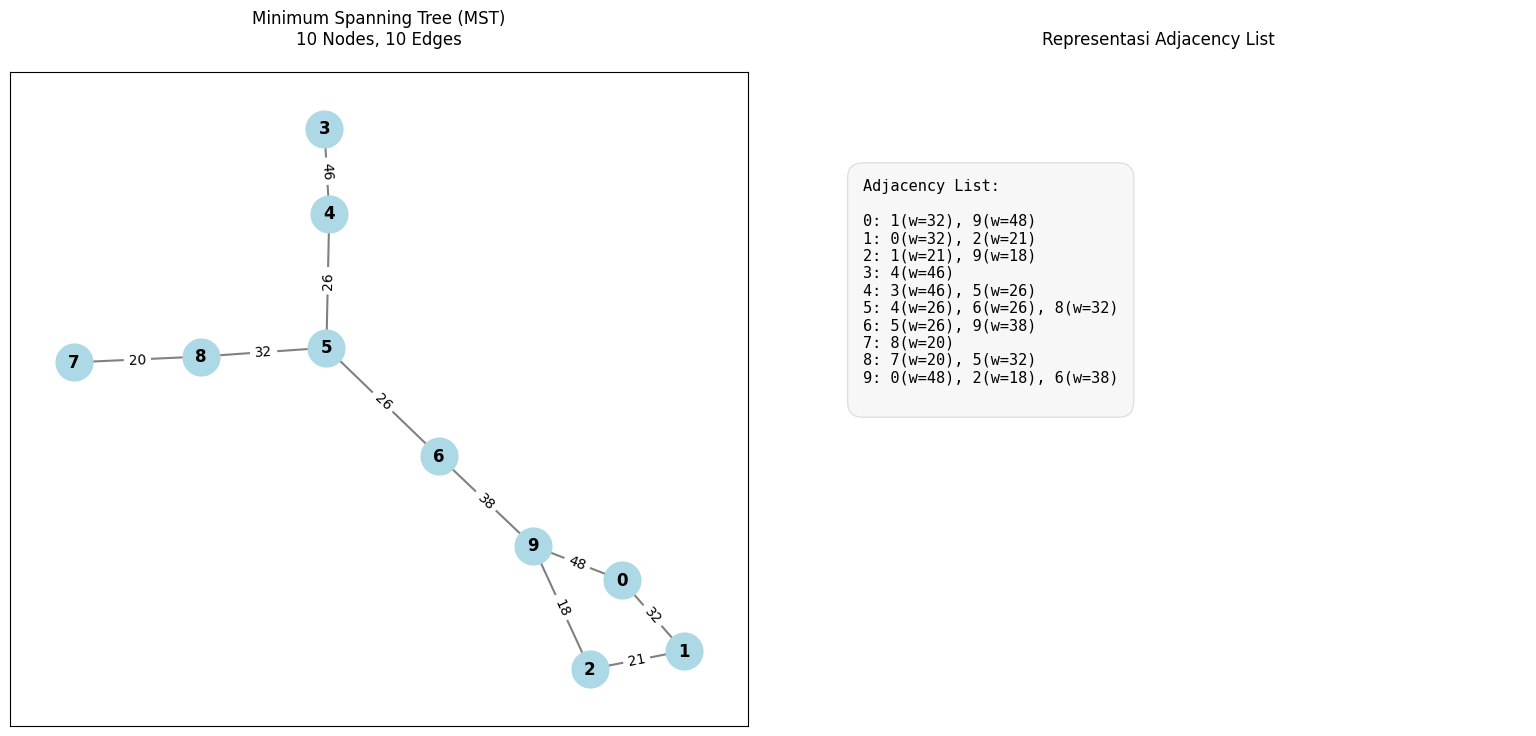

In [60]:
def visualize_mst(graph, adj_list):
    plt.figure(figsize=(16, 8))

    # Layout untuk graf
    pos = nx.spring_layout(graph, seed=42)

    # Plot 1: Visualisasi Graf
    plt.subplot(1, 2, 1)

    # Gambar edges dengan bobot
    nx.draw_networkx_edges(graph, pos, width=1.5, edge_color='gray')

    # Gambar nodes
    nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')

    # Highlight edges dengan bobot
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)

    # Gambar labels
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight='bold')

    plt.title(f"Minimum Spanning Tree (MST)\n{len(graph.nodes())} Nodes, {len(graph.edges())} Edges", pad=20)

    # Plot 2: Adjacency List
    plt.subplot(1, 2, 2)

    # Format adjacency list untuk display
    adj_text = "Adjacency List:\n\n"
    for node, neighbors in adj_list.items():
        connections = ", ".join([f"{n}(w={neighbors[n]['weight']})" for n in neighbors])
        adj_text += f"{node}: {connections}\n"

    plt.text(0.1, 0.5, adj_text,
             fontfamily='monospace', fontsize=11,
             bbox=dict(facecolor='#f7f7f7', edgecolor='#e0e0e0', boxstyle='round,pad=1'))

    plt.axis('off')
    plt.title("Representasi Adjacency List", pad=20)

    plt.tight_layout(pad=3)
    plt.show()

m = 10
G_mst = nx.connected_watts_strogatz_graph(m, k=3, p=0.3)
for u, v in G_mst.edges():
    G_mst[u][v]['weight'] = np.random.randint(1, 50)

adj_list = dict(G_mst.adjacency())

# Panggil fungsi visualisasi
visualize_mst(G_mst, adj_list)

#**Kruskal's Algorithm**

> Kruskal’s Algorithm adalah algoritma untuk mencari Minimum Spanning Tree (MST) dengan memilih edge dengan bobot terkecil dan memastikan tidak ada siklus. Algoritma ini bekerja dengan pendekatan Greedy.


**Cara kerja:**

- Urutkan semua edge berdasarkan bobot (ascending).

- Pilih edge dengan bobot terkecil yang tidak membentuk siklus.

- Tambahkan edge tersebut ke MST.

- Ulangi langkah 2-3 hingga MST memiliki (V - 1) edge.

**Kompleksitas waktu:**

- O(E log E) , karena sorting edge memakan O(E log E) dan Union-Find O(α(V)) ≈ O(1).

**Kompleksitas ruang:**

- O(V + E) , karena menyimpan semua edge dan parent untuk Union-Find.


#**Prim's Algorithm**
> Prim’s Algorithm adalah algoritma untuk mencari Minimum Spanning Tree (MST) dengan memilih node awal dan terus menambahkan edge dengan bobot terkecil yang menghubungkan node yang sudah dipilih ke node yang belum dipilih.

**Cara kerja:**

- Mulai dari sembarang node dan tetapkan semua jarak ke ∞ kecuali node awal (0).

- Pilih edge dengan bobot terkecil yang menghubungkan node terpilih ke node yang belum dipilih.

- Tandai node sebagai terpilih dan ulangi langkah 2 hingga semua node terhubung.

**Kompleksitas waktu:**

- O(V²) , dengan adjacency matrix.

- O((V + E) log V) , dengan min-heap (priority queue).

**Kompleksitas ruang:**

- O(V + E) , untuk menyimpan graf dan informasi jarak.

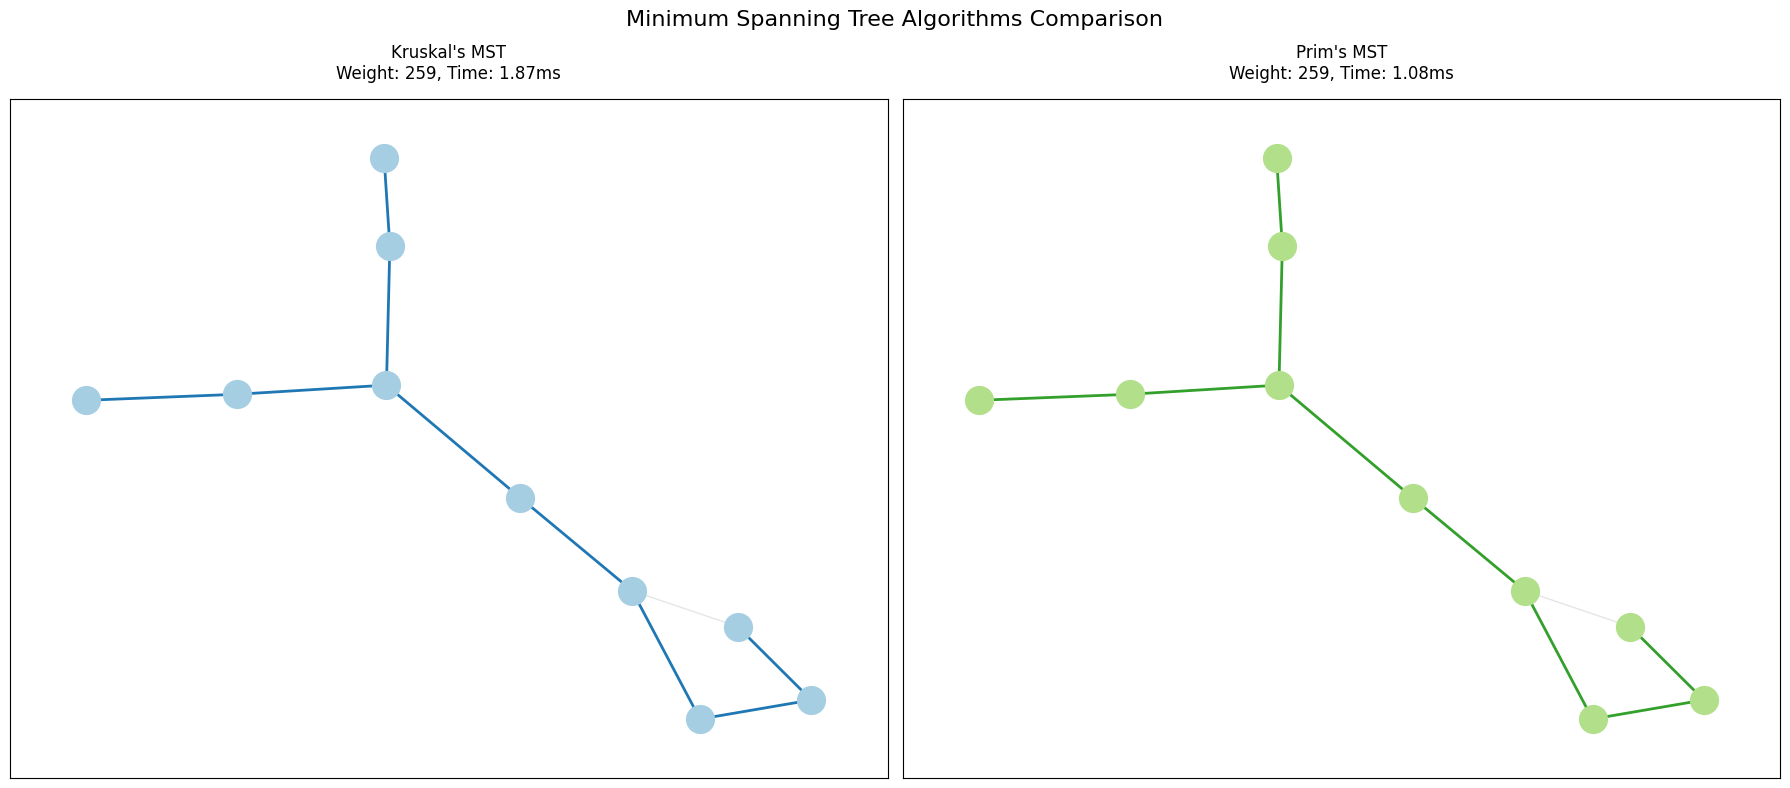

In [75]:
# Algoritma Kruskal
start_time = time.time()
mst_kruskal = nx.minimum_spanning_tree(G_mst, algorithm='kruskal')
kruskal_time = time.time() - start_time

# Algoritma Prim
start_time = time.time()
mst_prim = nx.minimum_spanning_tree(G_mst, algorithm='prim')
prim_time = time.time() - start_time

# Visualisasi komparatif
def compare_mst_algorithms(graph, kruskal_result, prim_result, kruskal_time, prim_time):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    pos = nx.spring_layout(graph, seed=42)
    edge_labels = nx.get_edge_attributes(graph, 'weight')

    # Kruskal Visualization
    nx.draw_networkx_nodes(graph, pos, ax=ax1, node_size=400, node_color='#a6cee3')
    nx.draw_networkx_edges(graph, pos, ax=ax1, width=1, edge_color='gray', alpha=0.2)
    nx.draw_networkx_edges(graph, pos, edgelist=kruskal_result.edges(),
                         ax=ax1, width=2, edge_color='#1f78b4')
    kruskal_weight = sum(edge_labels[e] for e in kruskal_result.edges())
    ax1.set_title(f"Kruskal's MST\nWeight: {kruskal_weight}, Time: {kruskal_time*1000:.2f}ms", pad=15)

    # Prim Visualization
    nx.draw_networkx_nodes(graph, pos, ax=ax2, node_size=400, node_color='#b2df8a')
    nx.draw_networkx_edges(graph, pos, ax=ax2, width=1, edge_color='gray', alpha=0.2)
    nx.draw_networkx_edges(graph, pos, edgelist=prim_result.edges(),
                         ax=ax2, width=2, edge_color='#33a02c')
    prim_weight = sum(edge_labels[e] for e in prim_result.edges())
    ax2.set_title(f"Prim's MST\nWeight: {prim_weight}, Time: {prim_time*1000:.2f}ms", pad=15)

    plt.suptitle("Minimum Spanning Tree Algorithms Comparison", fontsize=16)
    plt.tight_layout()
    plt.show()

compare_mst_algorithms(G_mst, mst_kruskal, mst_prim, kruskal_time, prim_time)

# **Kesimpulan Soal 2**

Algoritma Kruskal dan Prim merupakan dua pendekatan utama untuk mencari Minimum Spanning Tree (MST) pada graf berbobot, meskipun keduanya memiliki metodologi dan efisiensi yang berbeda. Kruskal bekerja dengan mengurutkan seluruh edge berdasarkan bobot, lalu memilih edge terkecil secara berurutan selama tidak membentuk siklus, menggunakan struktur data Union-Find untuk mendeteksi siklus. Metode ini sangat efisien untuk graf sparse (sedikit edge) dengan kompleksitas waktu O(ElogE), terutama jika edge telah terurut. Di sisi lain, Prim membangun MST secara bertahap dari node awal dengan memanfaatkan priority queue (seperti heap) untuk memilih edge terpendek yang terhubung ke pohon yang sedang dibangun. Pendekatan ini lebih cepat untuk graf dense (banyak edge) dengan kompleksitas O(ElogV) menggunakan binary heap, karena menghindari pengurutan semua edge sekaligus.

Perbedaan utama terletak pada struktur data dan adaptabilitas. Kruskal cenderung lebih mudah diimplementasikan untuk kasus edge statis, sementara Prim lebih fleksibel dalam menangani graf dinamis yang terus diperbarui. Meskipun keduanya menjamin solusi optimal, Kruskal direkomendasikan untuk graf sparse atau saat edge mudah diurutkan, sedangkan Prim lebih unggul pada graf dense atau ketika efisiensi waktu untuk graf besar menjadi prioritas. Pemilihan akhir bergantung pada karakteristik graf, ketersediaan sumber daya komputasi, dan kebutuhan spesifik aplikasi.

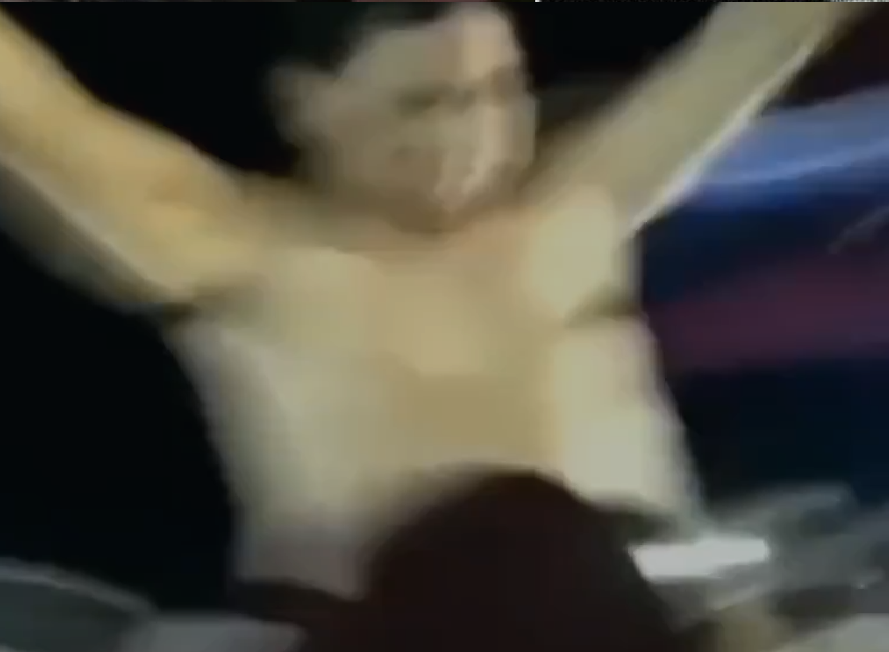